<div style="text-align: center;">
    <img src="Datos/VISUALIZACIÓN AVANZADA PORTADA.png" alt="Encabezado" style="width: 100%; height: auto"/>
</div>

# 1. Introducción 📌

El objetivo de este estudio es analizar la evolución del COVID-19 desde el año 2020 hasta el 2022. Durante este periodo, el virus tuvo un impacto significativo en la salud pública y nuestra investigación se centrará en identificar la evolución de la enfermedad. Para ello, recopilaremos y examinaremos datos de distintas fuentes para ofrecer una visión detallada de cómo ha progresado la pandemia en este lapso de tiempo.

Además, evaluaremos la incidencia del COVID-19 en las diferentes provincias de España. Este análisis regional permitirá entender mejor cómo factores geográficos, demográficos y socioeconómicos influyeron en la propagación del virus y la eficacia de las medidas de control implementadas.

Por último, se investigará el impacto del COVID-19 en distintos grupos de edad y entre hombres y mujeres. Este aspecto del estudio es esencial para identificar vulnerabilidades específicas y tendencias en la morbilidad y mortalidad asociadas al virus. Al desglosar los datos por género y grupo etario, podremos ofrecer recomendaciones más precisas para futuras políticas de salud pública y estrategias de mitigación, asegurando así una respuesta más equitativa y eficaz en futuras crisis sanitarias.

# 2. Importación de librerías 📚

In [1]:
#Datos
import pandas as pd

#Visualización estática.
import matplotlib.pyplot as plt
import numpy as np
import geopandas as gpd
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

# 3. Lectura de datos 👩🏻‍🏫

In [2]:
prov = pd.read_csv("DATOS/provinces_es.csv")
covid = pd.read_csv("DATOS/casos_hosp_uci_def_sexo_edad_provres.csv")

In [3]:
prov.head()

,code,postal_code,name,phone_code,iso2
0,VI,1,Álava,945,ES
1,AB,2,Albacete,967,ES
2,A,3,Alacant,950,ES
3,AL,4,Almería,920,ES
4,AV,5,Ávila,924,ES


In [4]:
covid.head()

,provincia_iso,sexo,grupo_edad,fecha,num_casos,num_hosp,num_uci,num_def
0,A,H,0-9,2020-01-01,0,0,0,0
1,A,H,10-19,2020-01-01,0,0,0,0
2,A,H,20-29,2020-01-01,0,0,0,0
3,A,H,30-39,2020-01-01,0,0,0,0
4,A,H,40-49,2020-01-01,0,0,0,0


In [5]:
covid['provincia_iso'].unique()

array(['A', 'AB', 'AL', 'AV', 'B', 'BA', 'BI', 'BU', 'C', 'CA', 'CC',
       'CE', 'CO', 'CR', 'CS', 'CU', 'GC', 'GI', 'GR', 'GU', 'H', 'HU',
       'J', 'L', 'LE', 'LO', 'LU', 'M', 'MA', 'ML', 'MU', nan, 'NC', 'O',
       'OR', 'P', 'PM', 'PO', 'S', 'SA', 'SE', 'SG', 'SO', 'SS', 'T',
       'TE', 'TF', 'TO', 'V', 'VA', 'VI', 'Z', 'ZA'], dtype=object)

Ambas tablas contienen una columna con el código ISO de las provincias de España, por tanto, uniré ambas tablas a través de esas columnas. 

Puesto que en la tabla COVID esta columna tiene un nombre diferente que en la tabla correspondiente a las PROVINCIAS, voy a cambiar el nombre de la columna CODE del dataset de PROVINCIAS por el nombre provincia_iso.

Antes de realizar la unión de ambas tablas, voy a comprobar que no existe ningún valor nulo en la columna que emplearé de unión.

In [6]:
covid.isnull().sum()

provincia_iso    24510
sexo                 0
grupo_edad           0
fecha                0
num_casos            0
num_hosp             0
num_uci              0
num_def              0
dtype: int64

In [7]:
prov.isnull().sum()

code           1
postal_code    0
name           0
phone_code     0
iso2           0
dtype: int64

En el caso del dataset COVID encontramos 24.510 datos nulos en la columna PROVINCIA_ISO, puesto que en este dataset solo encontramos esta columna relativa a las provincias, eso indica que para estos registros se desconoce la provincia del paciente, sustituímos los datos nulos por NO CONOCIDA. 

En el caso del dataset PROV encontramos 1 único valor nulo en la columna CODE que corresponde a la provincia Nafarroa, cuyo código ISO de provincia es NC, vamos a sustituir el valor nulo por su código ISO.

In [8]:
prov.fillna('NC', inplace=True)

In [9]:
covid.fillna("N/C", inplace=True)

Una vez limpios ambos dataset, los unimos a través de la columna correspondiente al código ISO de la provincia. 

In [10]:
prov.rename(columns={'code': 'provincia_iso'}, inplace=True)
prov.rename(columns={'postal_code': 'codigo_postal'}, inplace=True)

In [11]:
df_merge = pd.merge(covid, prov, on='provincia_iso', how='left')

In [12]:
df_merge.head()

,provincia_iso,sexo,grupo_edad,fecha,num_casos,num_hosp,num_uci,num_def,codigo_postal,name,phone_code,iso2
0,A,H,0-9,2020-01-01,0,0,0,0,3.0,Alacant,950.0,ES
1,A,H,10-19,2020-01-01,0,0,0,0,3.0,Alacant,950.0,ES
2,A,H,20-29,2020-01-01,0,0,0,0,3.0,Alacant,950.0,ES
3,A,H,30-39,2020-01-01,0,0,0,0,3.0,Alacant,950.0,ES
4,A,H,40-49,2020-01-01,0,0,0,0,3.0,Alacant,950.0,ES


# 4. Análisis y limpieza de datos 📉

**Estructura de los datos**

In [13]:
df_merge.shape

(1299030, 12)

El dataset contiene más de 1 M. de filas y doce columnas

In [14]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1299030 entries, 0 to 1299029
Data columns (total 12 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   provincia_iso  1299030 non-null  object 
 1   sexo           1299030 non-null  object 
 2   grupo_edad     1299030 non-null  object 
 3   fecha          1299030 non-null  object 
 4   num_casos      1299030 non-null  int64  
 5   num_hosp       1299030 non-null  int64  
 6   num_uci        1299030 non-null  int64  
 7   num_def        1299030 non-null  int64  
 8   codigo_postal  1274520 non-null  float64
 9   name           1274520 non-null  object 
 10  phone_code     1274520 non-null  float64
 11  iso2           1274520 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 118.9+ MB


El tipo de dato de todas las columnas es correcto para los valores que dicha columna contiene, excepto para la columna fecha, para la cual vamos a cambiar el tipo de dato a DATETIME.

In [15]:
df_merge['fecha'] = pd.to_datetime(df_merge['fecha'])

**Valores nulos**

Comprobamos que la unión se ha realizado correctamente y que no existe ningún valor nulo en el nuevo dataset.

In [16]:
df_merge.isnull().sum()

provincia_iso        0
sexo                 0
grupo_edad           0
fecha                0
num_casos            0
num_hosp             0
num_uci              0
num_def              0
codigo_postal    24510
name             24510
phone_code       24510
iso2             24510
dtype: int64

Vemos que para las columnas postal_code, name, phone_code e iso2 existen 49.020 nulos, esto se debe los casos con provincias no conocidas del dataset de COVID, puesto que vamos a eliminar las columnas postal_code, phone_code e iso2, solo vamos a sustituir los nulos de la columna name, sustituimos los nulos por "NO CONOCIDA". 

In [17]:
df_merge2 = df_merge.drop(columns=['codigo_postal','phone_code', 'iso2'])

In [18]:
df_merge2.fillna("No conocida", inplace=True)

Aunque no se trata de un valor nulo, también vemos que existe el valor NO CONOCIDO dentro de la variable SEXO, vamos a ver qué peso tiene este valor dentro del dataset para, posteriormente, valorar el tratamiento que se realiza con este grupo. 

In [19]:
df_merge2.groupby('sexo')[['num_casos', 'num_hosp', 'num_uci', 'num_def']].sum()

,num_casos,num_hosp,num_uci,num_def
sexo,,,,
H,5448786,283684,33614,57368
M,6124724,233743,15715,46219
NC,9034,2487,223,249


El grupo NC en comparación con los otros dos grupos que componen la variable SEXO es muy pequeño, en ninguna de las categorías estudiadas llega a una representación sobre el total del 1%, por tanto, elimino las filas correspondientes al valor NC.

In [20]:
df_merge3 = df_merge2.loc[df_merge['sexo'] != 'NC']

# 5. Visualizaciones 📊

**5.1 Evolución del COVID**

In [21]:
df_evolucion = df_merge3[['fecha', 'sexo', 'num_casos']]

In [22]:
df_evolucion2 = df_evolucion.groupby(['fecha', 'sexo']).sum().reset_index()

In [23]:
df_evolucionH = df_evolucion2[df_evolucion2['sexo'] == 'H']
df_evolucionM = df_evolucion2[df_evolucion2['sexo'] == 'M']

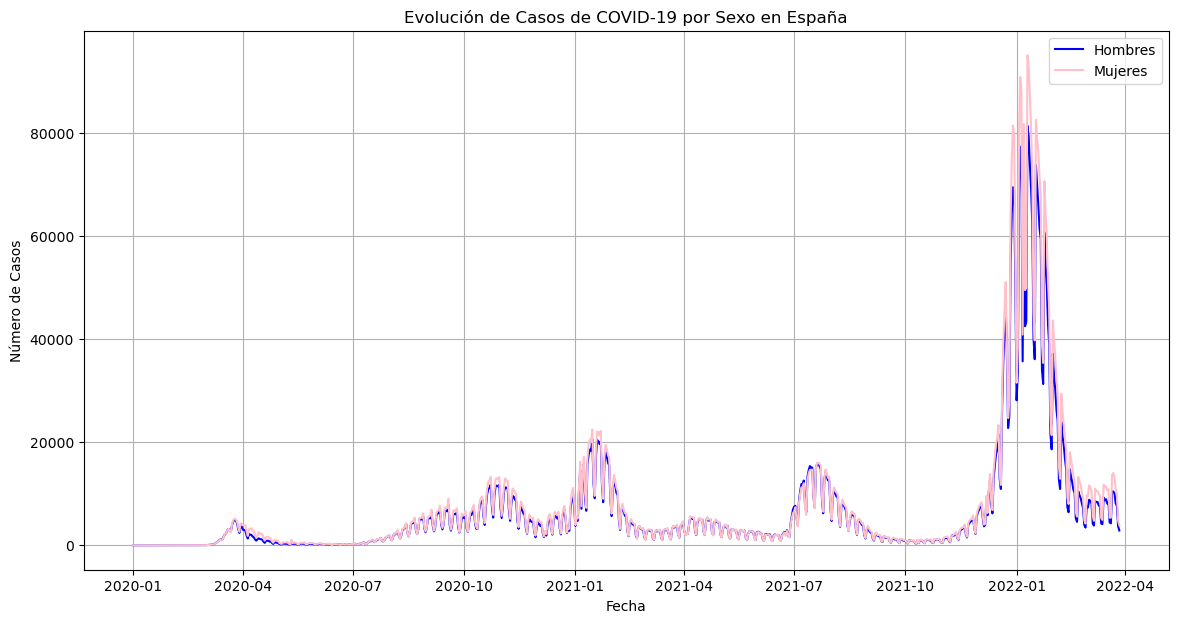

In [24]:
plt.figure(figsize=(14, 7))
plt.plot(df_evolucionH['fecha'], df_evolucionH['num_casos'], label='Hombres', color='blue', linestyle='-')
plt.plot(df_evolucionM['fecha'], df_evolucionM['num_casos'], label='Mujeres', color='pink', linestyle='-')

plt.title('Evolución de Casos de COVID-19 por Sexo en España')
plt.xlabel('Fecha')
plt.ylabel('Número de Casos')
plt.legend()
plt.grid(True)
plt.show()

Empleamos la media móvil de siete días (ciclo semanal), para poder suavizar el gráfico y observar más claramente la evolución de la enfermedad. 

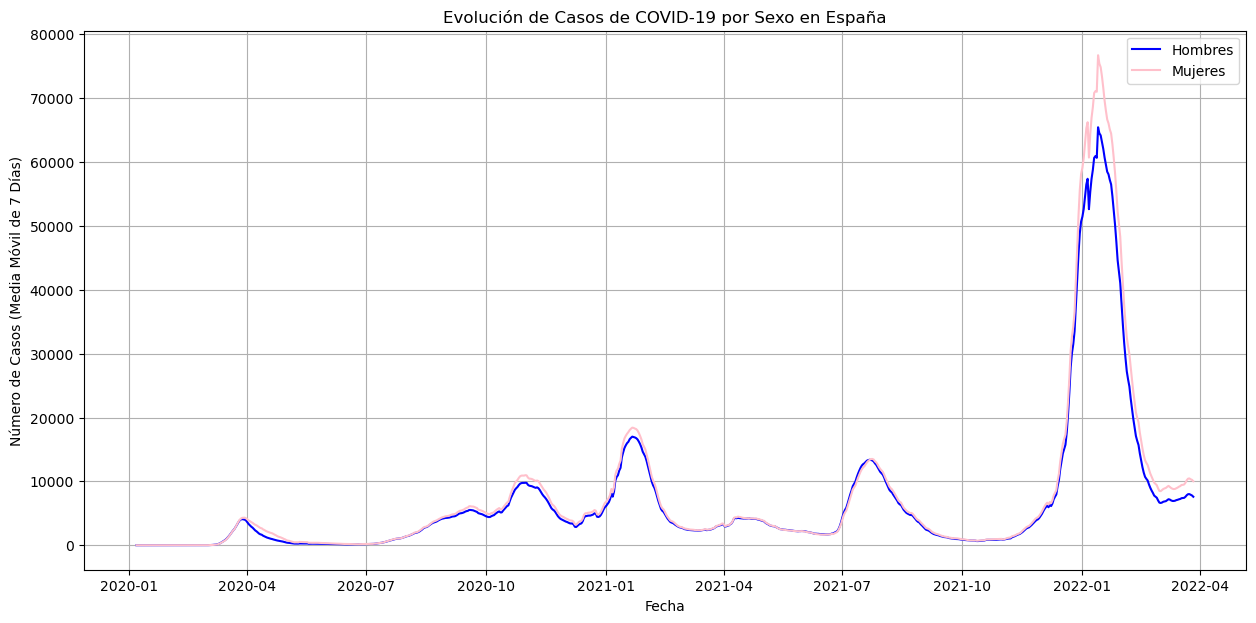

In [25]:
df_evolucionH = df_evolucion2[df_evolucion2['sexo'] == 'H'].copy()
df_evolucionM = df_evolucion2[df_evolucion2['sexo'] == 'M'].copy()

df_evolucionH.loc[:, 'num_casos_suavizados'] = df_evolucionH['num_casos'].rolling(window=7).mean()
df_evolucionM.loc[:, 'num_casos_suavizados'] = df_evolucionM['num_casos'].rolling(window=7).mean()

plt.figure(figsize=(15, 7))
plt.plot(df_evolucionH['fecha'], df_evolucionH['num_casos_suavizados'], label='Hombres', color='blue', linestyle='-')
plt.plot(df_evolucionM['fecha'], df_evolucionM['num_casos_suavizados'], label='Mujeres', color='pink', linestyle='-')

plt.title('Evolución de Casos de COVID-19 por Sexo en España')
plt.xlabel('Fecha')
plt.ylabel('Número de Casos (Media Móvil de 7 Días)')
plt.legend()
plt.grid(True)
plt.show()

En este gráfico se observa la evolución del COVID desde enero de 2020 hasta abril de 2022, podemos observar la aparición de las distintas olas del COVID al comienzo de la pandemia. 

Llama la atención el aumento significativo de casos en enero de 2022, este aumento de casos puede deberse al aumento de restricciones en las diferentes Comunidades Autónomas con motivo de la Navidad 2021, lo cual propició un aumento de la realización de test por parte de la población para poder disfrutar de las festividades, no tiene que estar vinculado este aumento con una mayor virulencia del virus. 

Para comprobar que realmente no existe una mayor virulencia del virus en el periodo descrito en el párrafo anterior, realizamos un gráfico donde se pueda comparar la evolución del número de casos junto con la evolución en la mortalidad. 

Puesto que en el gráfico anterior no vemos una especial diferencia entre el número de casos de hombres y mujeres, vamos a realizar el análisis entre la mortalidad y el número de casos sobre el total de la población, sin realizar divisiones por sexo. 

**5.2 Número de casos VS. Número de defunciones**

In [26]:
df_evolucionVSmortalidad = df_merge3[['fecha', 'num_casos', 'num_def']]

In [27]:
df_casos = df_evolucionVSmortalidad.groupby('fecha')['num_casos'].sum().reset_index()

df_defunciones = df_evolucionVSmortalidad.groupby('fecha')['num_def'].sum().reset_index()

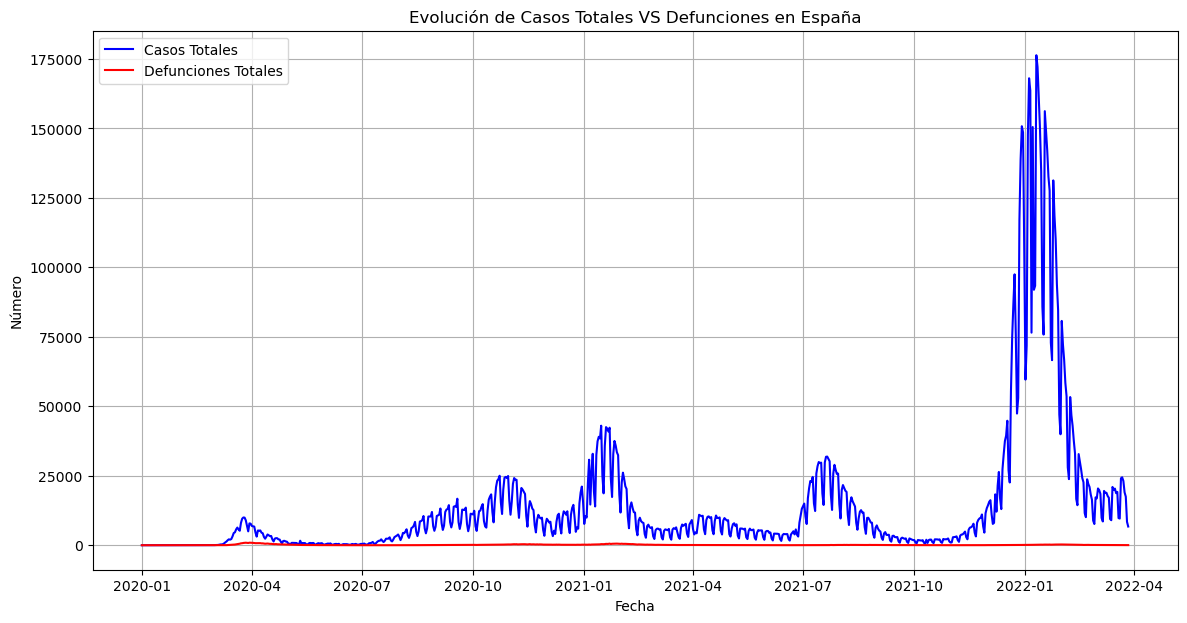

In [28]:
plt.figure(figsize=(14, 7))
plt.plot(df_casos['fecha'], df_casos['num_casos'], label='Casos Totales', color='blue', linestyle='-')
plt.plot(df_defunciones['fecha'], df_defunciones['num_def'], label='Defunciones Totales', color='red', linestyle='-')

plt.title('Evolución de Casos Totales VS Defunciones en España')
plt.xlabel('Fecha')
plt.ylabel('Número')
plt.legend()
plt.grid(True)
plt.show()

Vemos como las defunciones son claramente inferiores al número de casos, sin embargo, no podemos apreciar correctamente la evolución de las defunciones en función del número de casos debido al gran número de casos correspondientes a la Navidad de 2021. 

Para solventar el problema vamos a realizar un gráfico suavizado de cada uno de los tres años, pudiendo así valorar mejor la evolución de las defunciones en función de la evolución del número de casos. 

In [29]:
df_merge3.loc[:, 'año'] = df_merge3['fecha'].dt.year

C:\Users\Usuario1\AppData\Local\Temp\ipykernel_13500\678194567.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merge3.loc[:, 'año'] = df_merge3['fecha'].dt.year


**5.2.1 2020**

In [30]:
df_2020 = df_merge3[df_merge3['año'] == 2020]

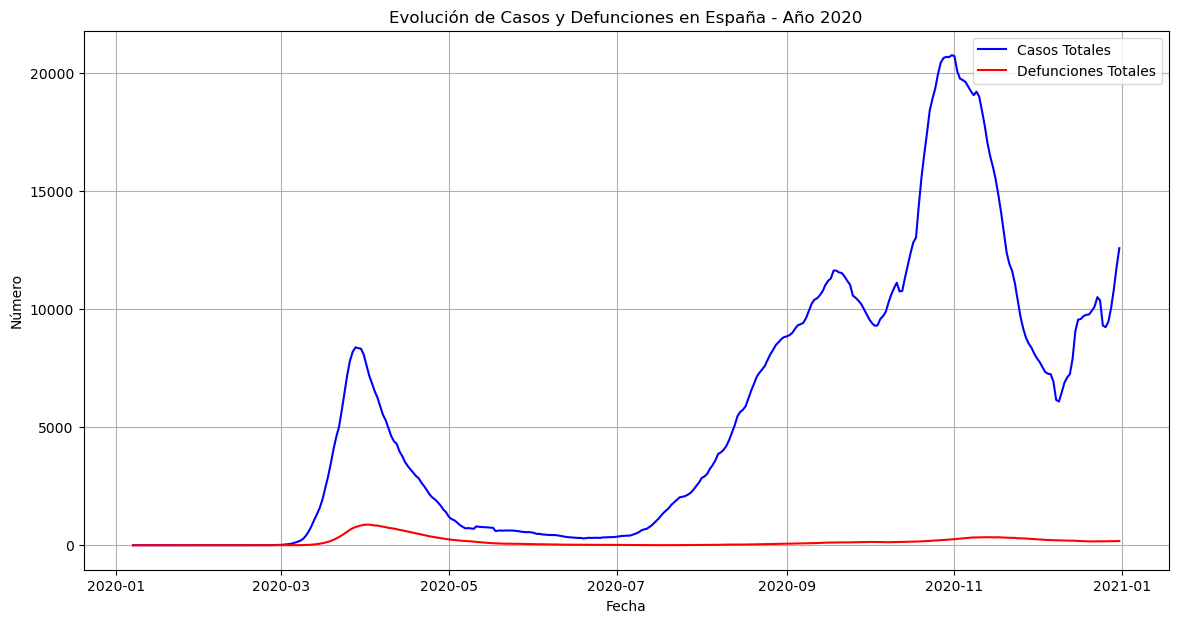

In [31]:
df_casos_2020 = df_2020.groupby(df_2020['fecha'])['num_casos'].sum().reset_index()
df_defunciones_2020 = df_2020.groupby(df_2020['fecha'])['num_def'].sum().reset_index()

# Suavizar los datos.
df_casos_2020['num_casos_suavizados'] = df_casos_2020['num_casos'].rolling(window=7).mean()
df_defunciones_2020['num_def_suavizadas'] = df_defunciones_2020['num_def'].rolling(window=7).mean()

plt.figure(figsize=(14, 7))
plt.plot(df_casos_2020['fecha'], df_casos_2020['num_casos_suavizados'], label='Casos Totales', color='blue', linestyle='-')
plt.plot(df_defunciones_2020['fecha'], df_defunciones_2020['num_def_suavizadas'], label='Defunciones Totales', color='red', linestyle='-')

plt.title('Evolución de Casos y Defunciones en España - Año 2020')
plt.xlabel('Fecha')
plt.ylabel('Número')
plt.legend()
plt.grid(True)
plt.show()

En 2020 vemos un mayor número de defunciones relacionadas con las olas de contagio, con un decalaje en el comienzo de la curva. Observamos este aumento tanto para la ola de marzo-abril 2020 como para la ola de noviembre-diciembre 2020 (siendo este aumento del caso de defunciones menos pronunciado al que se observa en el primer caso). 

También observamos como el número de casos es considereablemente superior en la ola de noviembre-diciembre al correspondiente a la ola de marzo-abril, sin embargo, el número de defunciones es mayor en la ola de marzo-abril, esto puede ser así debido a un aumento de la realización de test de manera particular durante la segunda ola, al comienzo de las vacunaciones y al comienzo de la creación de inmunidad de grupo.

**5.2.2 2021**

In [32]:
df_2021 = df_merge3[df_merge3['año'] == 2021]

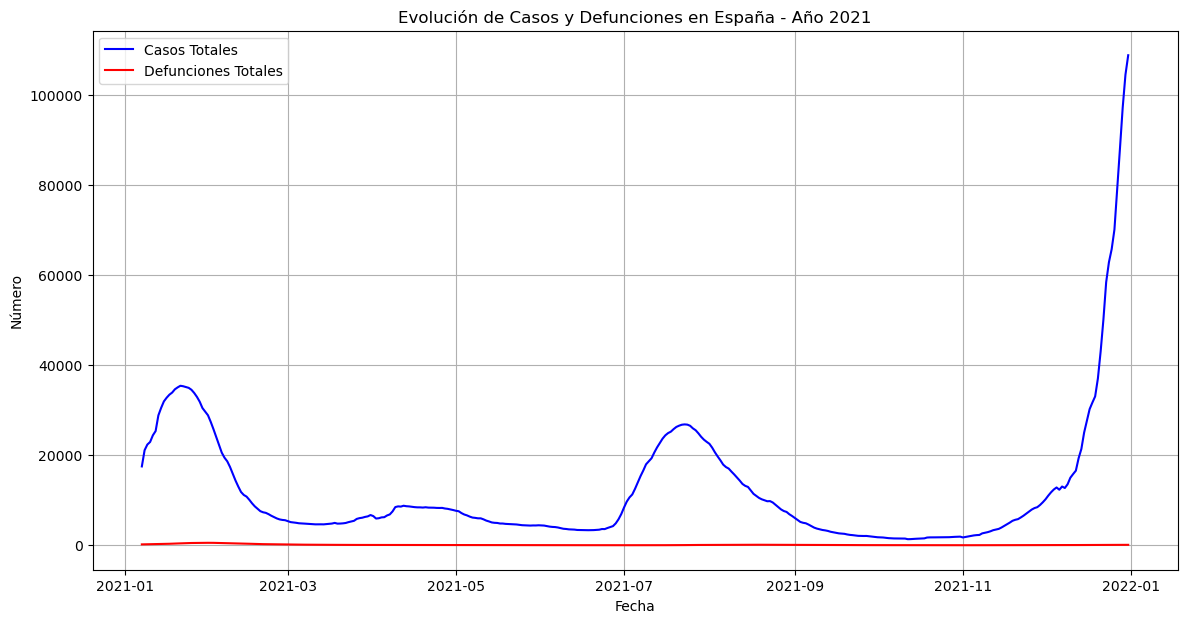

In [33]:
df_casos_2021 = df_2021.groupby(df_2021['fecha'])['num_casos'].sum().reset_index()
df_defunciones_2021 = df_2021.groupby(df_2021['fecha'])['num_def'].sum().reset_index()

# Suavizar los datos.
df_casos_2021['num_casos_suavizados'] = df_casos_2021['num_casos'].rolling(window=7).mean()
df_defunciones_2021['num_def_suavizadas'] = df_defunciones_2021['num_def'].rolling(window=7).mean()

plt.figure(figsize=(14, 7))
plt.plot(df_casos_2021['fecha'], df_casos_2021['num_casos_suavizados'], label='Casos Totales', color='blue', linestyle='-')
plt.plot(df_defunciones_2021['fecha'], df_defunciones_2021['num_def_suavizadas'], label='Defunciones Totales', color='red', linestyle='-')

plt.title('Evolución de Casos y Defunciones en España - Año 2021')
plt.xlabel('Fecha')
plt.ylabel('Número')
plt.legend()
plt.grid(True)
plt.show()

**5.2.3 2022**

In [34]:
df_2022 = df_merge3[df_merge3['año'] == 2022]

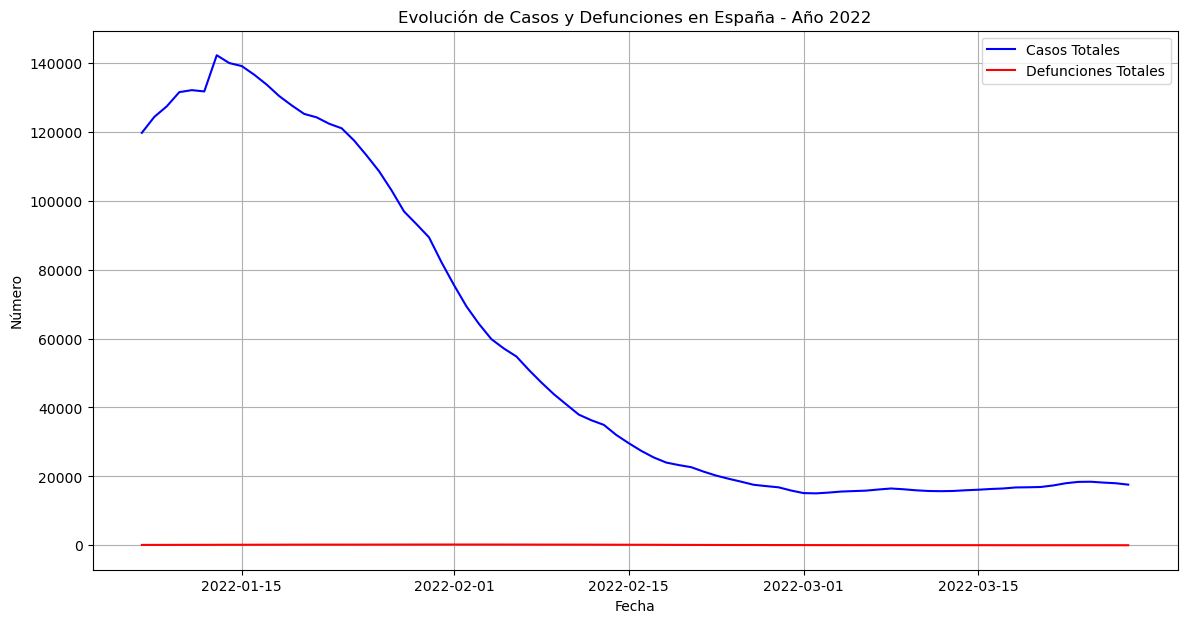

In [35]:
df_casos_2022 = df_2022.groupby(df_2022['fecha'])['num_casos'].sum().reset_index()
df_defunciones_2022 = df_2022.groupby(df_2022['fecha'])['num_def'].sum().reset_index()

# Suavizar los datos.
df_casos_2022['num_casos_suavizados'] = df_casos_2022['num_casos'].rolling(window=7).mean()
df_defunciones_2022['num_def_suavizadas'] = df_defunciones_2022['num_def'].rolling(window=7).mean()

plt.figure(figsize=(14, 7))
plt.plot(df_casos_2022['fecha'], df_casos_2022['num_casos_suavizados'], label='Casos Totales', color='blue', linestyle='-')
plt.plot(df_defunciones_2022['fecha'], df_defunciones_2022['num_def_suavizadas'], label='Defunciones Totales', color='red', linestyle='-')

plt.title('Evolución de Casos y Defunciones en España - Año 2022')
plt.xlabel('Fecha')
plt.ylabel('Número')
plt.legend()
plt.grid(True)
plt.show()

Tanto en 2020 como en 2021 podemos observar como las defunciones no aumentan en gran medida ante un aumento de casos, la posible explicación a este hecho podría ser la expuesta en la última ola de 2020, un mayor número de test realizados y una mayor inmunidad debido a la inmunidad de grupo y al uso de vacunas.

**5.3 Defunciones**

Analizamos si existe una diferencia en la tasa de defunciones por sexo o, si como ocurre con el número de casos, no se observa una diferencia significativa entre ambos sexos. 

In [36]:
df_defuncion = df_merge3[['fecha', 'sexo', 'num_def']]

In [37]:
df_defuncion2 = df_defuncion.groupby(['fecha', 'sexo']).sum().reset_index()

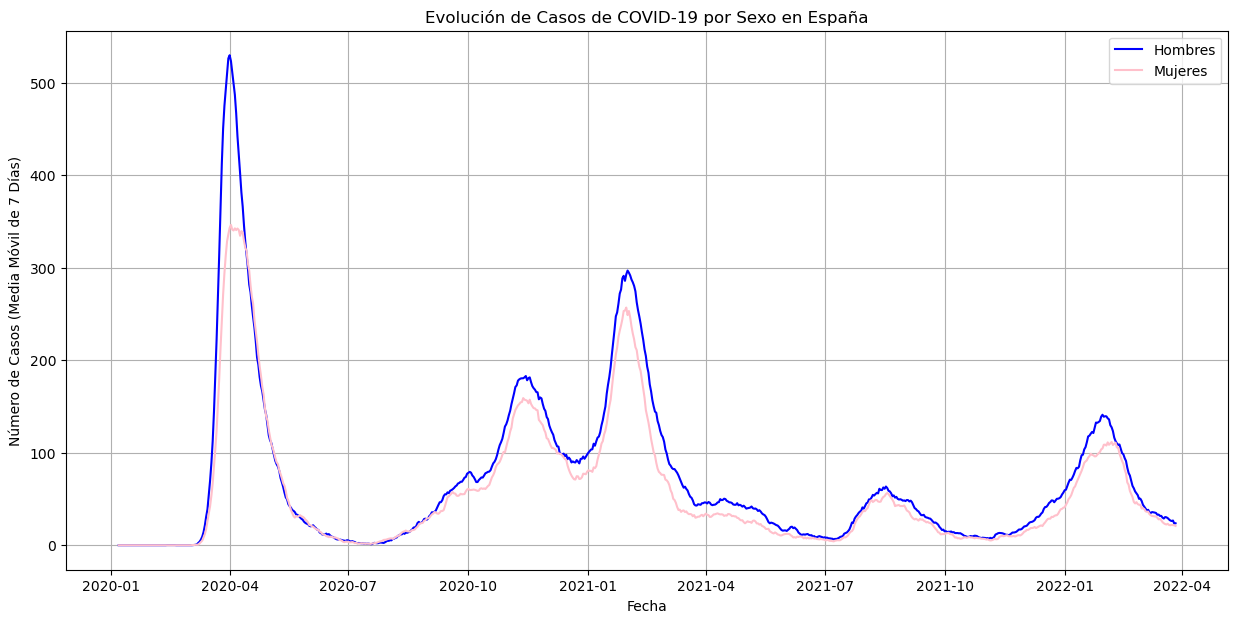

In [38]:
df_defuncionH = df_defuncion2[df_defuncion2['sexo'] == 'H'].copy()
df_defuncionM = df_defuncion2[df_defuncion2['sexo'] == 'M'].copy()

#Suavizar los datos.
df_defuncionH.loc[:, 'num_def_suavizados'] = df_defuncionH['num_def'].rolling(window=7).mean()
df_defuncionM.loc[:, 'num_def_suavizados'] = df_defuncionM['num_def'].rolling(window=7).mean()

plt.figure(figsize=(15, 7))
plt.plot(df_defuncionH['fecha'], df_defuncionH['num_def_suavizados'], label='Hombres', color='blue', linestyle='-')
plt.plot(df_defuncionM['fecha'], df_defuncionM['num_def_suavizados'], label='Mujeres', color='pink', linestyle='-')

plt.title('Evolución de Casos de COVID-19 por Sexo en España')
plt.xlabel('Fecha')
plt.ylabel('Número de Casos (Media Móvil de 7 Días)')
plt.legend()
plt.grid(True)
plt.show()

Observamos mayores defunciones entre los hombres que entre las mujeres, especialmente notable durante la priemra ola del COVID. 

**5.4 Casos por provincias (2020)**

Vamos a ver cómo afectó la pandemia a las diferentes provincias mediante una evolución de los casos durante el año de la pandemia (2020).

In [39]:
df_merge3.loc[:, 'mes'] = df_merge3['fecha'].dt.month

C:\Users\Usuario1\AppData\Local\Temp\ipykernel_13500\2657344481.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merge3.loc[:, 'mes'] = df_merge3['fecha'].dt.month


In [40]:
df_provincia = df_merge3[df_merge3['año'] == 2020]

In [41]:
meses_ordenados = sorted(df_provincia['mes'].unique())

In [42]:
meses = {1: 'Enero', 2: 'Febrero', 3: 'Marzo', 4: 'Abril', 5: 'Mayo', 6: 'Junio', 
         7: 'Julio', 8: 'Agosto', 9: 'Septiembre', 10: 'Octubre', 11: 'Noviembre', 12: 'Diciembre'}

df_provincia.loc[:,'mes'] = df_provincia['mes'].map(meses)

C:\Users\Usuario1\AppData\Local\Temp\ipykernel_13500\938135057.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['Enero' 'Enero' 'Enero' ... 'Diciembre' 'Diciembre' 'Diciembre']' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  df_provincia.loc[:,'mes'] = df_provincia['mes'].map(meses)


In [43]:
df_provincia

,provincia_iso,sexo,grupo_edad,fecha,num_casos,num_hosp,num_uci,num_def,name,año,mes
0,A,H,0-9,2020-01-01,0,0,0,0,Alacant,2020,Enero
1,A,H,10-19,2020-01-01,0,0,0,0,Alacant,2020,Enero
2,A,H,20-29,2020-01-01,0,0,0,0,Alacant,2020,Enero
3,A,H,30-39,2020-01-01,0,0,0,0,Alacant,2020,Enero
4,A,H,40-49,2020-01-01,0,0,0,0,Alacant,2020,Enero
...,...,...,...,...,...,...,...,...,...,...,...
581925,ZA,M,50-59,2020-12-31,2,1,0,0,Zamora,2020,Diciembre
581926,ZA,M,60-69,2020-12-31,3,1,0,0,Zamora,2020,Diciembre
581927,ZA,M,70-79,2020-12-31,1,0,0,0,Zamora,2020,Diciembre
581928,ZA,M,80+,2020-12-31,0,0,0,0,Zamora,2020,Diciembre


In [44]:
df_provincia_agrupado = df_provincia.groupby(['provincia_iso', 'mes'])['num_casos'].sum().reset_index()

In [45]:
df_provincia2 = df_provincia_agrupado.pivot(index = "provincia_iso", 
                                columns = "mes", 
                                values = "num_casos")

In [46]:
column_order = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']
df_provincia_pivot = df_provincia2.reindex(columns=column_order)
df_gradiente = df_provincia_pivot.style.background_gradient(cmap='YlGn')

In [47]:
df_gradiente

mes,Enero,Febrero,Marzo,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre
provincia_iso,,,,,,,,,,,,
A,0,0,2511,1324,260,53,692,3420,5967,10365,14139,18136
AB,0,0,1659,1548,178,78,122,1164,2045,3340,3399,3313
AL,0,1,288,194,38,32,803,3686,3030,4070,6104,3342
AV,0,0,763,901,127,64,16,477,1080,1663,1245,421
B,1,6,19365,19910,4670,2247,14326,23831,24377,73050,47395,39705
BA,0,0,546,349,81,23,282,1072,3302,6353,5547,5469
BI,0,0,3476,3982,601,313,1563,9040,7856,10978,13588,5848
BU,0,1,872,1106,230,74,184,1944,2798,6474,7553,1940
C,1,0,2015,1856,200,21,165,2920,2844,5223,5883,4947


Este gráfico nos muestra las provincias con más casos en cada mes, las provincias por mes con más casos aparecen con un color más oscuro que las provincias con menos casos. 

Vemos que Madrid y Barcelona, especialmente Madrid, son las provincias con más casos en todos los meses, sin embargo, en este gráfico no estamos teniendo en cuenta la población de cada provincia, es esperable que en las grandes ciudades existan más casos de COVID, ya que hay más población. Vamos a comprobar el índice de casos en cada una de las provincias, es decir, metemos la varaible población. 

In [48]:
poblacion2020 = pd.read_csv("DATOS/PoblacionEspana-Provincia_2020.csv", encoding='latin1', delimiter=';')

In [49]:
poblacion2020.head()

,Edad Simple,Provincias,Sexo,Periodo,Total
0,0 años,02 Albacete,Hombres,1 de julio de 2020,"1.475,500000"
1,0 años,02 Albacete,Mujeres,1 de julio de 2020,"1.352,500000"
2,0 años,03 Alicante/Alacant,Hombres,1 de julio de 2020,"6.962,000000"
3,0 años,03 Alicante/Alacant,Mujeres,1 de julio de 2020,"6.641,000000"
4,0 años,04 Almería,Hombres,1 de julio de 2020,"3.568,500000"


In [50]:
poblacion2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10504 entries, 0 to 10503
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Edad Simple  10504 non-null  object
 1   Provincias   10504 non-null  object
 2   Sexo         10504 non-null  object
 3   Periodo      10504 non-null  object
 4   Total        10504 non-null  object
dtypes: object(5)
memory usage: 410.4+ KB


In [51]:
poblacion2020['Total'] = poblacion2020['Total'].str.replace('.', '')  
poblacion2020['Total'] = poblacion2020['Total'].str.replace(',', '.')  

In [52]:
poblacion2020['Total'] = poblacion2020['Total'].astype(float).round(4)

In [53]:
df_poblacion = poblacion2020[['Provincias', 'Total']]

In [54]:
df_poblacion2 = df_poblacion.groupby('Provincias').sum().reset_index()

In [55]:
df_poblacion2[['codigo_postal', 'provincia']] = df_poblacion2['Provincias'].str.split(' ', n=1, expand=True)

In [56]:
df_poblacion2.drop(columns=['Provincias'], inplace=True)

In [57]:
df_poblacion2['codigo_postal'] = df_poblacion2['codigo_postal'].astype(int)

In [58]:
df_poblacion3 = pd.merge(prov, df_poblacion2, on='codigo_postal', how='right')

In [59]:
df_poblacion4 = pd.merge(df_provincia_agrupado, df_poblacion3, on = "provincia_iso", how = "right")
df_poblacion4

,provincia_iso,mes,num_casos,codigo_postal,name,phone_code,iso2,Total,provincia
0,VI,Abril,956,1,Álava,945,ES,330157.0385,Araba/Álava
1,VI,Agosto,2627,1,Álava,945,ES,330157.0385,Araba/Álava
2,VI,Diciembre,2390,1,Álava,945,ES,330157.0385,Araba/Álava
3,VI,Enero,0,1,Álava,945,ES,330157.0385,Araba/Álava
4,VI,Febrero,1,1,Álava,945,ES,330157.0385,Araba/Álava
...,...,...,...,...,...,...,...,...,...
619,ML,Marzo,58,52,Melilla,95,ES,84304.6456,Melilla
620,ML,Mayo,7,52,Melilla,95,ES,84304.6456,Melilla
621,ML,Noviembre,1036,52,Melilla,95,ES,84304.6456,Melilla
622,ML,Octubre,1987,52,Melilla,95,ES,84304.6456,Melilla


In [60]:
df_poblacion5 = df_poblacion4.drop(columns=['codigo_postal','phone_code', 'iso2','name'])

In [61]:
df_poblacion5['casos_por_100k'] = (df_poblacion4['num_casos'] / df_poblacion4['Total']) * 100000

In [62]:
df_provincia_poblacion = df_poblacion5.pivot(index = "provincia_iso", 
                                columns = "mes", 
                                values = "casos_por_100k")

In [63]:
column_order = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']
df_provincia_pivot2 = df_provincia_poblacion.reindex(columns=column_order)
df_gradiente2 = df_provincia_pivot2.style.background_gradient(cmap='YlGn')

In [64]:
df_gradiente2

mes,Enero,Febrero,Marzo,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre
provincia_iso,,,,,,,,,,,,
A,0.000000,0.000000,132.873419,70.061492,13.758299,2.804576,36.618242,180.974550,315.752964,548.479885,748.186888,959.694278
AB,0.000000,0.000000,426.448052,397.915361,45.755126,20.049999,31.360255,299.207675,525.669841,858.551232,873.717257,851.610848
AL,0.000000,0.139442,40.159354,27.051787,5.298804,4.462150,111.972087,513.983949,422.509866,567.529754,851.155188,466.015832
AV,0.000000,0.000000,482.621600,569.910959,80.331511,40.482022,10.120505,301.717567,683.134113,1051.900028,787.501825,266.295798
B,0.017747,0.106482,343.671784,353.343931,82.878762,39.877640,254.244357,422.930146,432.620040,1296.422609,841.121828,704.646950
BA,0.000000,0.000000,81.482904,52.083395,12.088123,3.432430,42.084577,159.981087,492.777564,948.096869,827.812582,816.172167
BI,0.000000,0.000000,304.293579,348.589480,52.612325,27.400429,136.827061,791.373406,687.724500,961.028457,1189.511265,511.941557
BU,0.000000,0.281683,245.627809,311.541694,64.787151,20.844562,51.829721,547.592272,788.149782,1823.617473,2127.553718,546.465539
C,0.089056,0.000000,179.448571,165.288609,17.811273,1.870184,14.694300,260.044579,253.276295,465.141382,523.918581,440.561826


Como podemos observar, si bien es verdad que Madrid y Barcelona siguen teniendo un índice elevado, el resto de provincias también tiene un índice elevado de casos, ya no sobresalen de manera tan clara las provincias de Madrid y Barcelona sobre el resto. 

**5.5 Defunciones por provincia**

In [65]:
df_provincia_agrupado2 = df_provincia.groupby(['provincia_iso','name'])['num_def'].sum().reset_index()

In [67]:
spain_map = gpd.read_file('DATOS/spain.geojson')

In [68]:
merged_data = spain_map.set_index('provincia').join(df_provincia_agrupado2.set_index('name'))

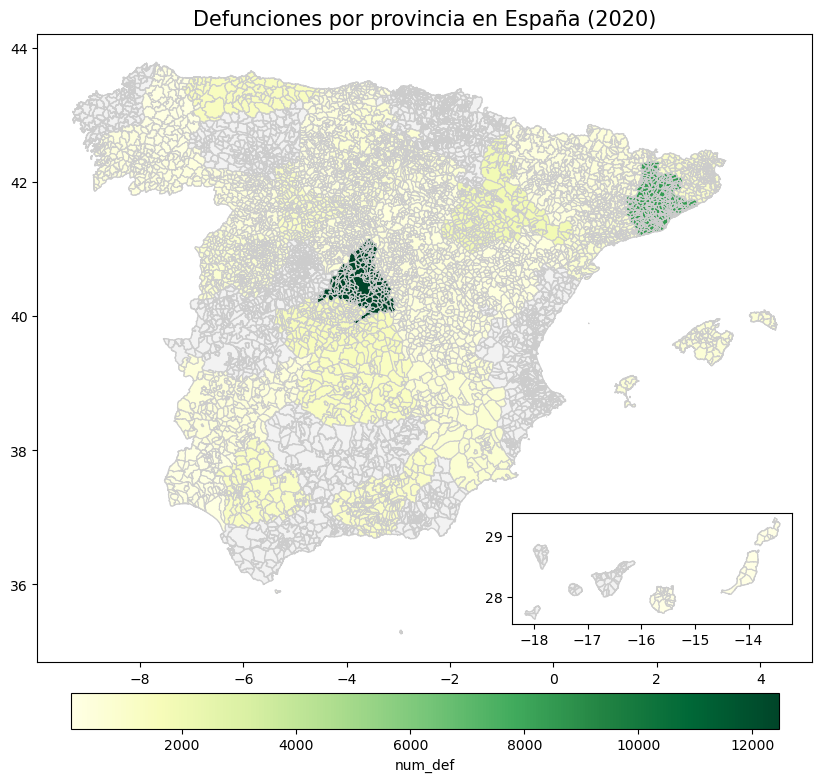

In [100]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

peninsula = spain_map[spain_map['comautonom'] != 'Canarias']
peninsula.plot(ax=ax, color='#f2f2f2', edgecolor='0.8')

merged_data[merged_data['comautonom'] != 'Canarias'].plot(
    column='num_def', cmap='YlGn', linewidth=0.8, ax=ax, edgecolor='0.8', legend=False)

canary_ax = fig.add_axes([0.6, 0.12, 0.28, 0.3])

canarias = spain_map[spain_map['comautonom'] == 'Canarias']
canarias.plot(ax=canary_ax, color='#f2f2f2', edgecolor='0.8')

merged_data[merged_data['comautonom'] == 'Canarias'].plot(
    column='num_def', cmap='YlGn', linewidth=0.8, ax=canary_ax, edgecolor='0.8', legend=False)

ax.set_title('Defunciones por provincia en España (2020)', fontdict={'fontsize': '15', 'fontweight': '3'})
ax.annotate('Fuente: Tus datos aquí', xy=(0.1, .08), xycoords='figure fraction', 
            horizontalalignment='left', verticalalignment='top', fontsize=10, color='#555555')

sm = plt.cm.ScalarMappable(cmap='YlGn', norm=plt.Normalize(vmin=merged_data['num_def'].min(), vmax=merged_data['num_def'].max()))
sm._A = []
cbar = fig.colorbar(sm, ax=ax, orientation='horizontal', fraction=0.046, pad=0.04)
cbar.set_label('num_def')

plt.show()

Como ocurre con el número de casos, Barcelona y, sobre todo, Madrid, son las provincias con mayor número de defunciones durante 2020, como hicimos en el apartado anterior, vamos a calcular el número de defunciones por cada 100.000 habitantes. 

In [70]:
df_def_prov = pd.merge(df_provincia_agrupado2, df_poblacion3, on='provincia_iso', how='right')

In [71]:
df_def_prov2 = df_def_prov.drop(columns=['codigo_postal','phone_code', 'iso2','name_x','name_y'])

In [72]:
df_def_prov2['casos_por_100k'] = (df_def_prov['num_def'] / df_def_prov['Total']) * 100000

In [74]:
merged_data2 = spain_map.set_index('provincia').join(df_def_prov2.set_index('provincia'))

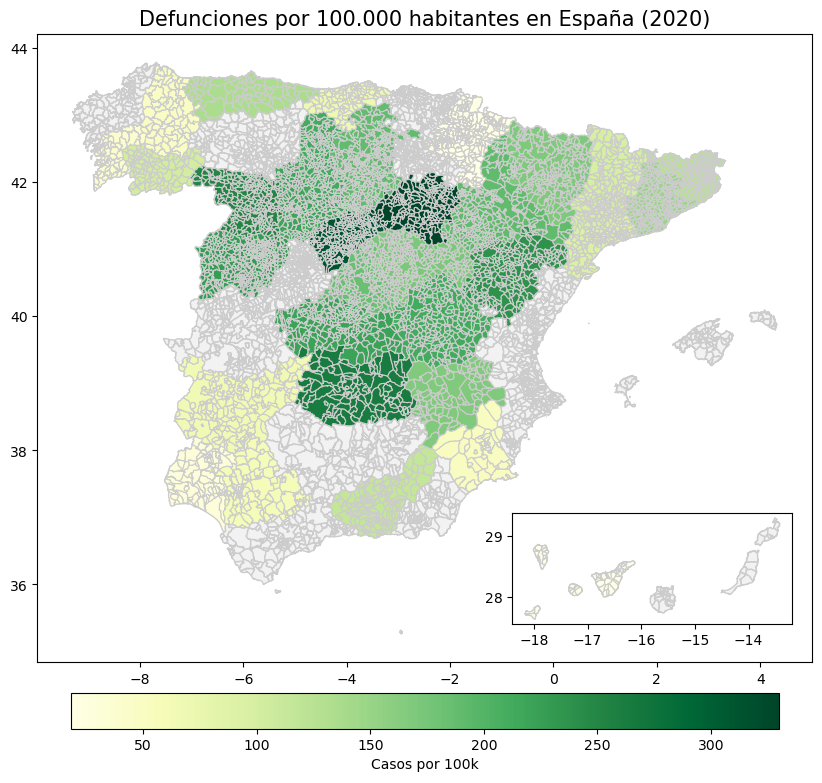

In [96]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

peninsula = spain_map[spain_map['comautonom'] != 'Canarias']
peninsula.plot(ax=ax, color='#f2f2f2', edgecolor='0.8')

merged_data2[merged_data2['comautonom'] != 'Canarias'].plot(
    column='casos_por_100k', cmap='YlGn', linewidth=0.8, ax=ax, edgecolor='0.8', legend=False)

canary_ax = fig.add_axes([0.6, 0.12, 0.28, 0.3])

canarias = spain_map[spain_map['comautonom'] == 'Canarias']
canarias.plot(ax=canary_ax, color='#f2f2f2', edgecolor='0.8')

merged_data2[merged_data2['comautonom'] == 'Canarias'].plot(
    column='casos_por_100k', cmap='YlGn', linewidth=0.8, ax=canary_ax, edgecolor='0.8', legend=False)

ax.set_title('Defunciones por 100.000 habitantes en España (2020)', fontdict={'fontsize': '15', 'fontweight': '3'})
ax.annotate('Fuente: Tus datos aquí', xy=(0.1, .08), xycoords='figure fraction', 
            horizontalalignment='left', verticalalignment='top', fontsize=10, color='#555555')

sm = plt.cm.ScalarMappable(cmap='YlGn', norm=plt.Normalize(vmin=merged_data2['casos_por_100k'].min(), vmax=merged_data2['casos_por_100k'].max()))
sm._A = []
cbar = fig.colorbar(sm, ax=ax, orientation='horizontal', fraction=0.046, pad=0.04)
cbar.set_label('Casos por 100k')

plt.show()

Como ocurre con el número de casos, al relativizar las defunciones en función del número de habitantes, se observa que la incidencia del COVID no solo se presentó en Madrid y en Barcelona, sino, también, en otras Provincias y CCAA.